In [1]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow tensorflow opencv-python matplotlib

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 1.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.25.1-cp310-abi3-win_amd64.whl.metadata (54

In [3]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.45.0
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.59.3
h5py                         3.10.0
idna                         3.4
ipykernel                    6.27.0
ipython                      8.17.2
jedi                         0.19.1
jupyter_client               8.6.0


In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [7]:
# Process Data

In [8]:
import cv2
import imghdr

C:\Users\bella\AppData\Local\Temp\ipykernel_8220\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'data'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext listdata\package\f9631784796415.5d67f9a9026d3.jpg
Image not in ext listdata\pill bottle\HTB1UEsMunJYBeNjy1zeq6yhzVXaM.jpg
Image not in ext listdata\pill bottle\icine-Bottles-with-Screw-cap-Pill-Tablet-Container-Food-Grade-Material-Child.jpg


In [12]:
# Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 95 files belonging to 3 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

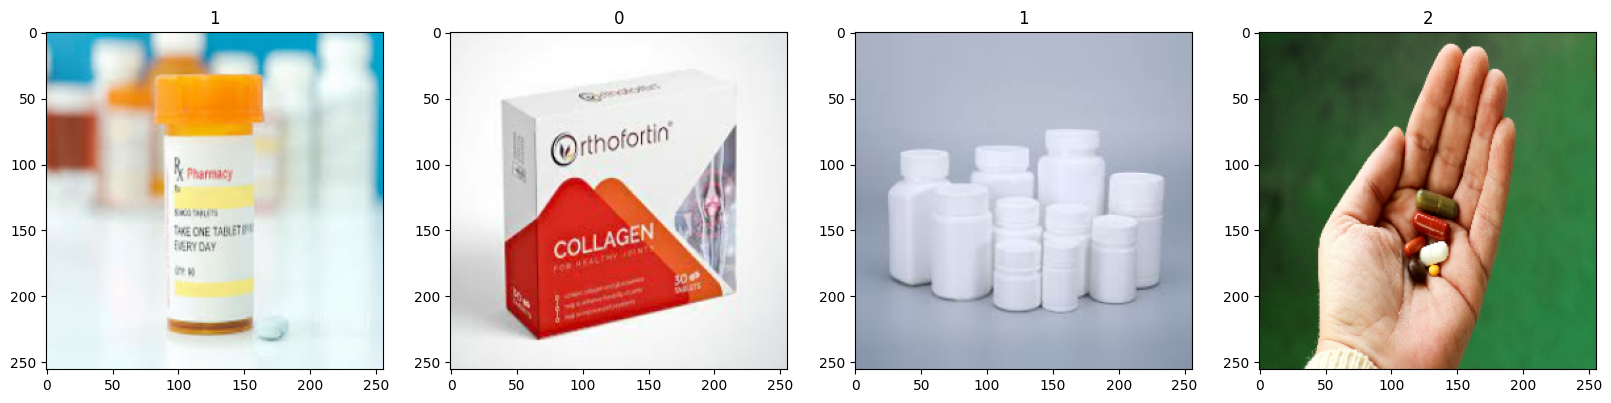

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
# Scale Data

In [19]:
data = data.map(lambda x,y:(x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

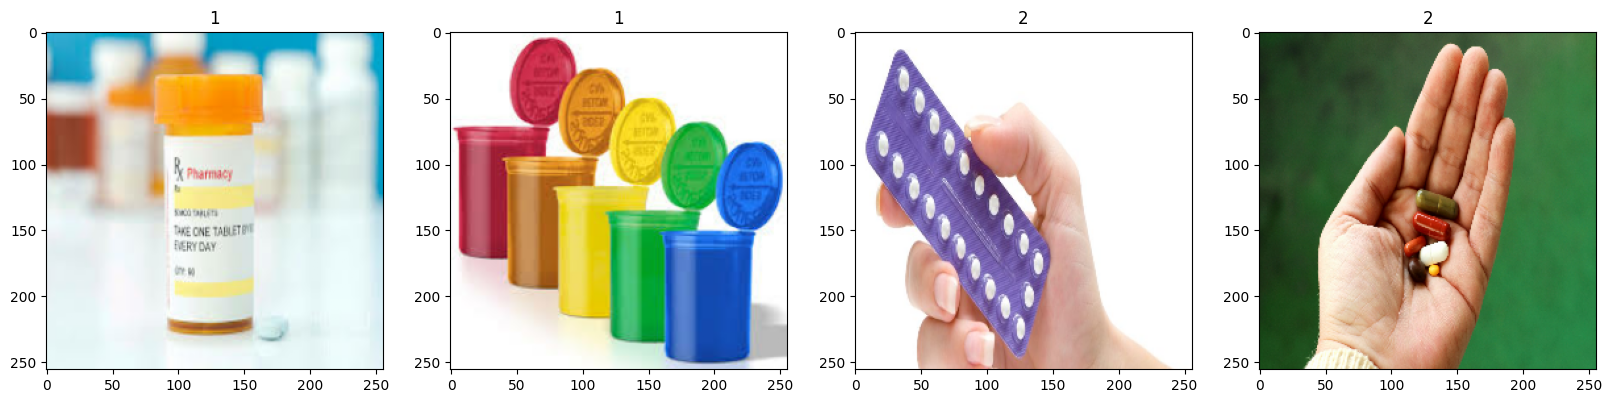

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
# Train and test split

In [24]:
len(data)

3

In [69]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)+1

In [70]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [71]:
# Build Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [73]:
model = Sequential()

In [74]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.compile('SGD', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [77]:
# Train Model

In [78]:
logdir='logs'

In [79]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [80]:
hist = model.fit(train,
                epochs=50,
                validation_data=val,
                callbacks=[tensorboard_callback])

Epoch 1/50
2/2 [==============================] - 2s 834ms/step - loss: 0.0000e+00 - accuracy: 0.4375 - val_loss: 0.0000e+00 - val_accuracy: 0.2812
Epoch 2/50
2/2 [==============================] - 1s 634ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.3125
Epoch 3/50
2/2 [==============================] - 1s 650ms/step - loss: 0.0000e+00 - accuracy: 0.3906 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 4/50
2/2 [==============================] - 1s 698ms/step - loss: 0.0000e+00 - accuracy: 0.2812 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 5/50
2/2 [==============================] - 1s 630ms/step - loss: 0.0000e+00 - accuracy: 0.2969 - val_loss: 0.0000e+00 - val_accuracy: 0.3125
Epoch 6/50
2/2 [==============================] - 1s 617ms/step - loss: 0.0000e+00 - accuracy: 0.2969 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 7/50
2/2 [==============================] - 1s 636ms/step - loss: 0.0000e+00 - accuracy: 0.3281 - val_loss

In [81]:
# Visualize loss and acc

In [82]:
hist.history

{'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.4375,
  0.3125,
  0.390625,
  0.28125,
  0.296875,
  0.296875,
  0.328125,
  0.359375,
  0.375,
  0.359375,
  0.390625,
  0.40625,
  0.359375,
  0.34375,
  0.375,
  0.328125,
  0.328125,
  0.34375,
  0.34375,
  0.296875,
  0.375,
  0.390625,
  0.40625,
  0.390625,
  0.390625,
  0.453125,
  0.359375,
  0.375,
  0.359375,
  0.359375,
  0.390625,
  0.375,
  0.390625,
  0.375,
  0.40625,
  0.421875,
  0.40625,
  0.4375,
  0.4375,
  0.40625,
  0.4375,
  0.421875,
  0.4375,
  0.34375,
  0.421875,
  0.375,
  0.328125,
  0.359375,
  0.390625,
  0.25],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


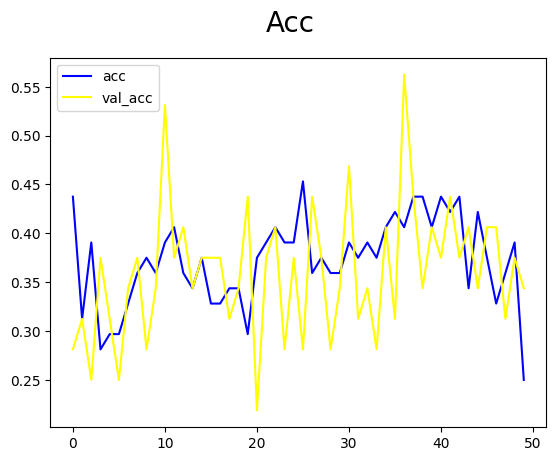

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='acc')
plt.plot(hist.history['val_accuracy'], color='yellow', label='val_acc')
fig.suptitle('Acc', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [84]:
# Evaluate Model

In [85]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [86]:
pre = Precision()
rc = Recall()
cacc = CategoricalAccuracy()

In [87]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rc.update_state(y, yhat)
    cacc.update_state(y, yhat)

1/1 [==============================] - 0s 199ms/step


In [88]:
print(f'Precision: {pre.result().numpy()}, Recall: {rc.result().numpy()}, Acc: {cacc.result().numpy()}')

Precision: 0.800000011920929, Recall: 0.52173912525177, Acc: 0.0


In [89]:
# Test

In [91]:
import cv2

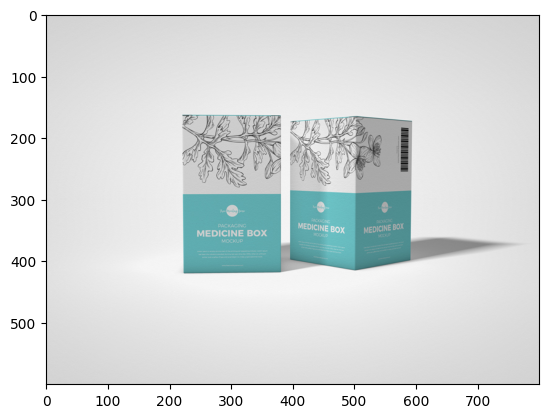

In [96]:
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [97]:
resize = tf.image.resize(img, (256, 256))

In [98]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 54ms/step


In [99]:
yhat

array([[0.46669033]], dtype=float32)

In [101]:
# Summary of the model
if yhat < 0.5:
    print(f'You should cross out any personal information on the Medicine Package before flattening the package and dispose it.')
elif yhat > 1:
    print(f'You should dispose pills to the take-up boxes or mix it with undesirable material.')
else:
    print(f'You should cross out any personal information on the Liquid Bottles and better dispose them in take-up boxes.')

You should cross out any personal information on the Medicine Package before flattening the package and dispose it.


In [102]:
# Save the model

In [103]:
from tensorflow.keras.models import load_model

In [106]:
model.save(os.path.join('models', 'medicine-disposal-model'))

INFO:tensorflow:Assets written to: models\medicine-disposal-model\assets


INFO:tensorflow:Assets written to: models\medicine-disposal-model\assets
